# Introducción a Seaborn

Seaborn es una interfaz de alto nivel de Matplotlib que permite realizar gráficos y visualizaciones de manera sencilla. Una de las características más ventajosas es que se integra de manera sutil con pandas y otras librerías numéricas para su mejor aprovechamiento

Se puede instalar con:
```bash
pip install seaborn
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importar el dataset
Trabajaremos con un dataset con datos acerca de los pokemon de la primera generación. Este dataset nos servirá para explorar las posibilidades que tenemos de visualización usando Seaborn y Pandas.


In [2]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='ISO-8859-1')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


# Funciones para ploteo
Existen 2 formas de realizar un plot usando seaborn:
  - Pasando el DataFrame al argumento `data`, agregando los nombres de columnas a los argumentos x y y.
  - Pasando las Series directamente a x y y

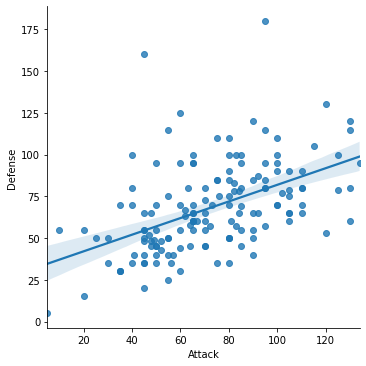

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df)

In [11]:
tanque = df[df['Defense'] >= 175]
print(tanque)

        Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                          
91  Cloyster  Water    Ice    525  50      95      180       85       45   

    Speed  Stage  Legendary  
#                            
91     70      2      False  


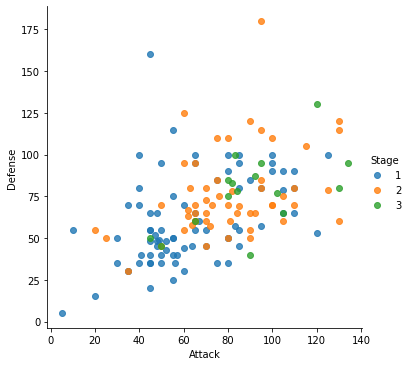

In [12]:
sns.lmplot(x='Attack', y='Defense', data=df,
            fit_reg=False,      # sin linea de regresion
            hue='Stage')        # coloreado por etapa de evolucion

## Personalizacion con Matplotlib


Text(0.5, 1.0, 'Ataque vs Defensa')

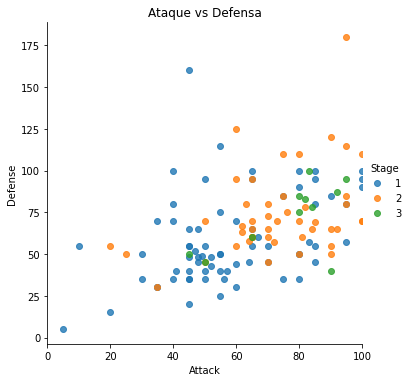

In [13]:
sns.lmplot(x='Attack', y='Defense', data=df,
            fit_reg=False,      # sin linea de regresion
            hue='Stage')        # coloreado por etapa de evolucion
plt.xlim(0,100)
plt.title('Ataque vs Defensa')

## Aprovechando Pandas


<AxesSubplot:>

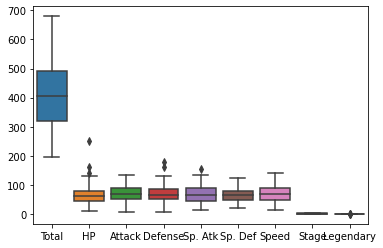

In [14]:
# boxplot
sns.boxplot(data=df)

<AxesSubplot:>

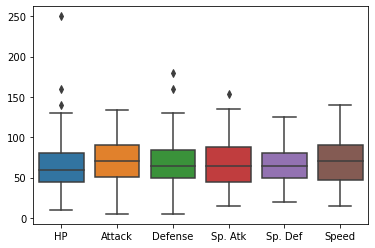

In [15]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

## Temas y paletas de color

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

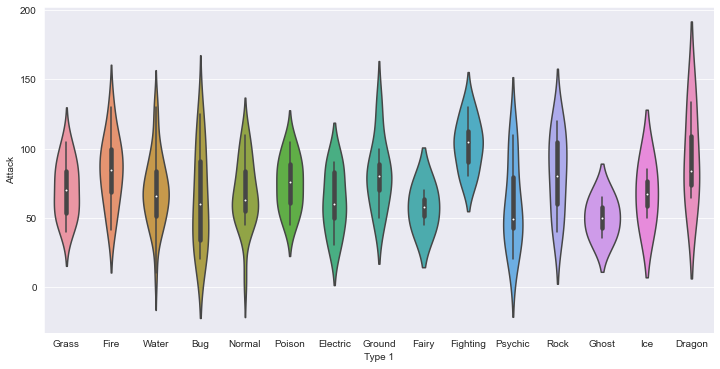

In [17]:
sns.set_style('darkgrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

In [18]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

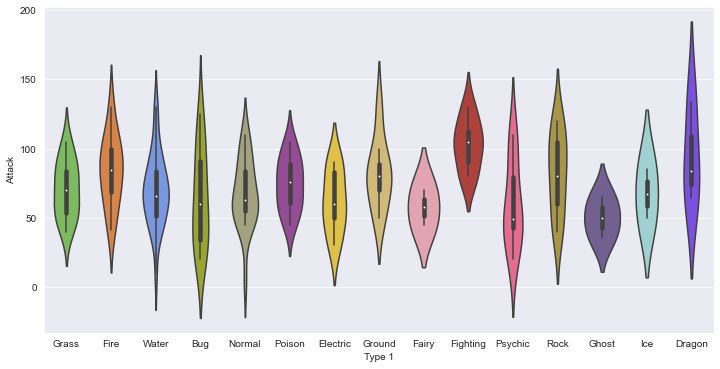

In [19]:
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

In [24]:
tanque2 = df[df['HP'] >= 200]
print(tanque2)

        Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
113  Chansey  Normal    NaN    450  250       5        5       35      105   

     Speed  Stage  Legendary  
#                             
113     50      1      False  


<AxesSubplot:xlabel='Type 1', ylabel='HP'>

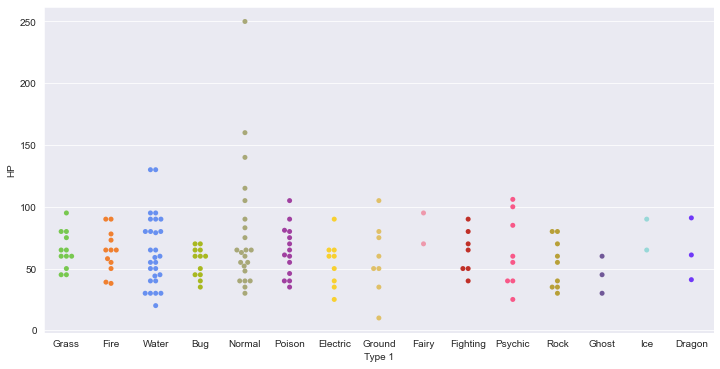

In [22]:
sns.swarmplot(x='Type 1', y='HP', data=df, palette=pkmn_type_colors)

## Overlays


Text(0.5, 1.0, 'Defensa por tipo')

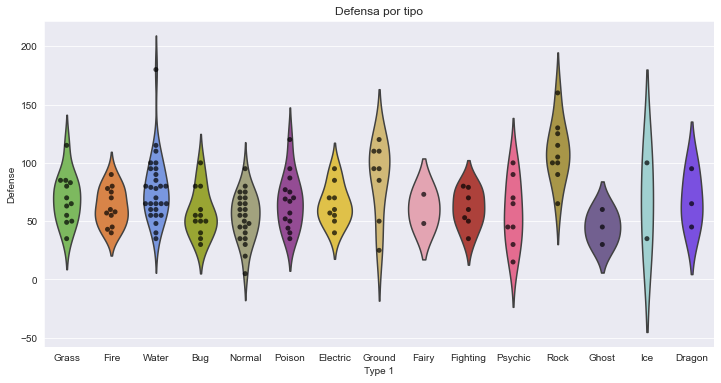

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Type 1', y='Defense', data=df, inner=None, palette=pkmn_type_colors)
sns.swarmplot(x='Type 1', y='Defense', data=df, color='k', alpha=0.7)
plt.title('Defensa por tipo')

## Diversos tipos de visualizaciones

In [26]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [29]:
melted_df = pd.melt(stats_df, id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stat')
melted_df.head(10)


,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
5,Charizard,Fire,Flying,HP,78
6,Squirtle,Water,NaN,HP,44
7,Wartortle,Water,NaN,HP,59
8,Blastoise,Water,NaN,HP,79
9,Caterpie,Bug,NaN,HP,45


In [30]:
melted_df[melted_df['Name'] == 'Bulbasaur']

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


In [31]:
print(stats_df.shape, melted_df.shape)

(151, 9) (906, 5)


<AxesSubplot:xlabel='Stat', ylabel='value'>

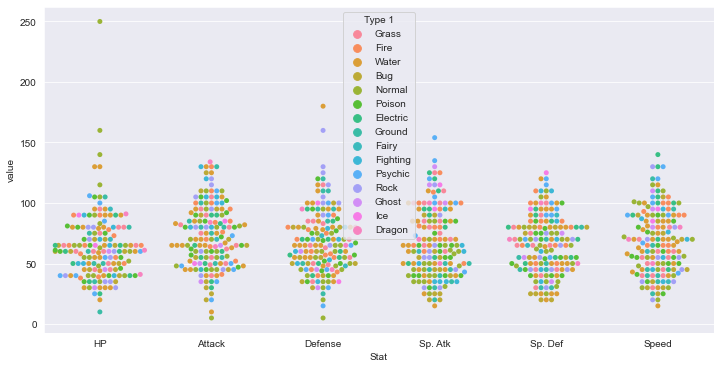

In [32]:
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

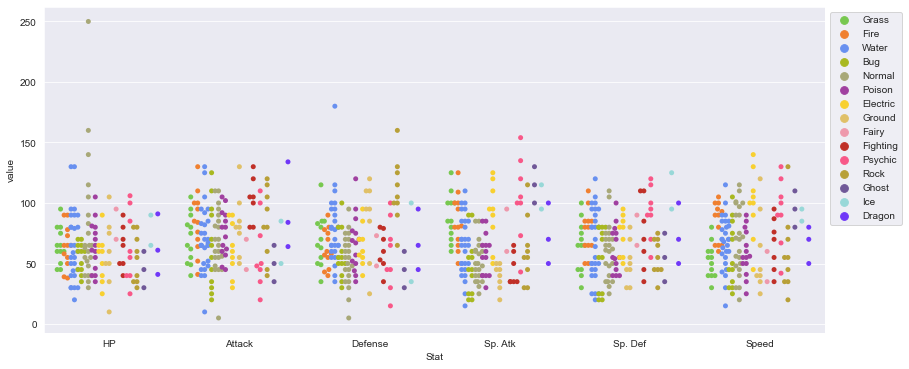

In [33]:
plt.figure(figsize=(14,6))
sns.swarmplot(x='Stat', 
                y='value', 
                data=melted_df, 
                hue='Type 1',
                split=True,
                palette=pkmn_type_colors)
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [34]:
# heatmap
corr = stats_df.corr()
print(corr)

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


<AxesSubplot:>

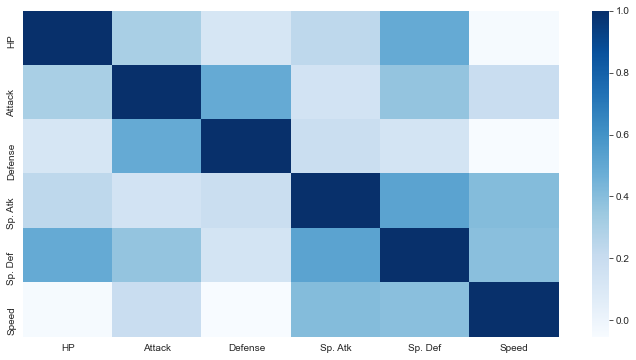

In [35]:
sns.heatmap(corr, cmap='Blues')

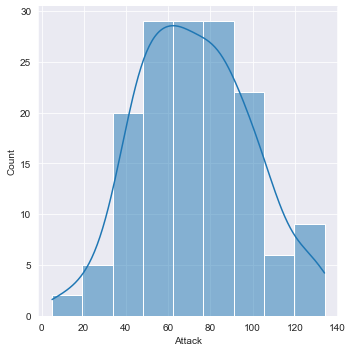

In [40]:
sns.displot(df['Attack'], kde=True)

<AxesSubplot:xlabel='Type 1', ylabel='count'>

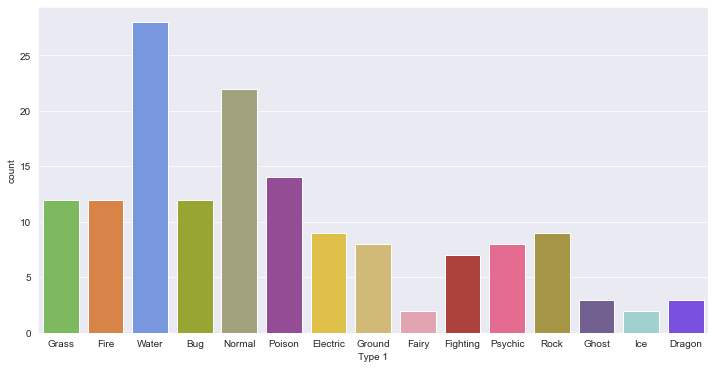

In [44]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

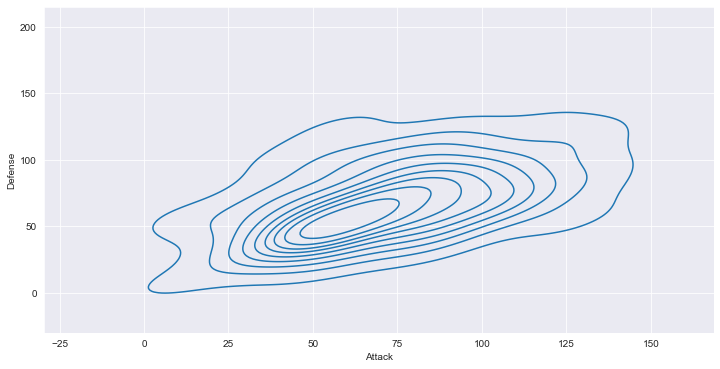

In [47]:
sns.kdeplot(df.Attack, df.Defense)

Text(0.5, 1.0, 'Ataque vs velocidad')

<Figure size 864x432 with 0 Axes>

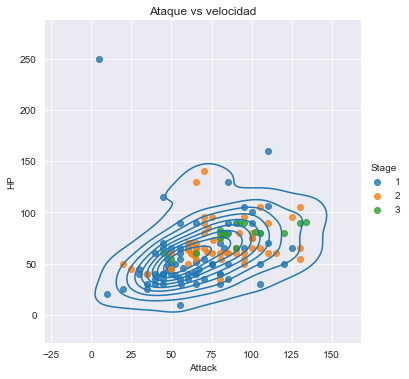

In [51]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Attack', y='HP', data=df,
            fit_reg=False,      # sin linea de regresion
            hue='Stage')        # coloreado por etapa de evolucion
sns.kdeplot(x='Attack', y='HP', data=df)
plt.title('Ataque vs velocidad')

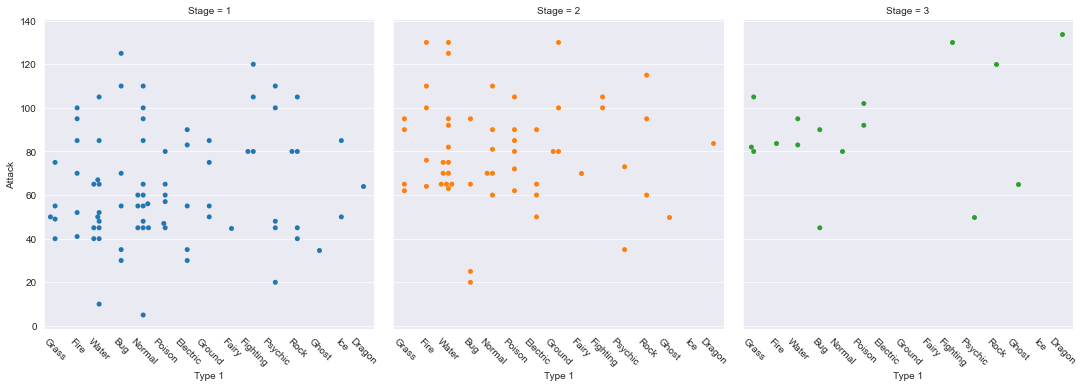

In [56]:
g = sns.factorplot(x='Type 1', y='Attack', data=df, hue='Stage', col='Stage', kind='swarm')
g.set_xticklabels(rotation=-45)

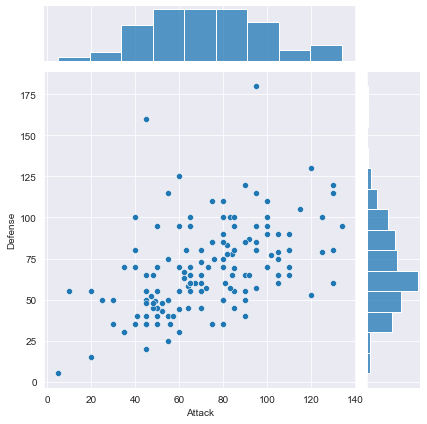

In [57]:
sns.jointplot(x='Attack', y='Defense', data=df)